In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt




# Coin Tossing Problem
We consider an experiment in which a coin was tossed 12 times, with 9 heads and 3 tails observed.

Let $\theta$ be the probability of observing a head for a toss of the coin

Suppose that we conduct a one-sided hypothesis test,
$$H_0:\theta \leq 0.5 \quad {\rm versus} \quad H_1:\theta>0.5.$$

Based on the binomial or negative binomial likelihood, the frequentist hypothesis test yields conflicting results under the significance level of $\alpha = 0.05$: The null hypothesis is accepted under the binomial distribution, but it is rejected under the negative binomial distribution.
##     Frequentist Hypothesis Test

In [24]:
n = 12
y = 9
r = n-y
# scipy.special.betainc(a,b,\theta)
pvalue_B = scipy.special.betainc(9,4,0.5)
pvalue_NB = scipy.special.betainc(9,3,0.5)



In [25]:

print("p-value under binomial: ",pvalue_B)
print("p-value under negative binomial: ",pvalue_NB)




p-value under binomial:  0.07299804687500001
p-value under negative binomial:  0.032714843749999986


## Bayesian Hypothesis Test

Under Bayesian paradigm, we assume a symmetric beta prior ($\alpha = \beta$) for $\theta$, i.e., $\theta \sim {\rm Beta}(\alpha, \beta)$. 

For $\alpha = 2,1,0.5,0.1,0.01,0.001,0.0001,0.00001$, calculate $P(H_0|n=12,y=3)$ and comment on your findings in comparison with the $p$-values obtained under the binomial and negative binomial likelihood.

Plot 
- (i) ${p\text{-value}}_{\rm B}$ against $P(H_0|n,y)$ 
- (ii) ${p\text{-value}}_{\rm NB}$ against $P(H_0|n,y)$ as sample size $n$ increases while fixing $y/n = 0.75$. For the Bayesian paradigm, we set $\alpha = \beta = 0.01$.
    

In [26]:
alpha_list = [2,1,0.5,0.1,0.01,0.001,0.0001,0.00001]
PoP_list = []
for alpha in alpha_list:
    PoP_list.append(scipy.special.betainc(y+alpha, n-y+alpha, 0.5))



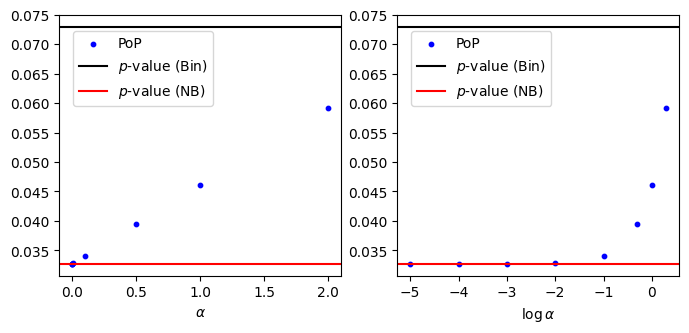

In [27]:

fig1 = plt.figure(figsize = (8,3))
fig1.subplots_adjust(top = 0.98)
ax1 = fig1.add_subplot(121)
ax1.scatter(alpha_list, PoP_list,color = 'blue', s = 10, label="PoP")
ax1.axhline(pvalue_B, color = 'black', label="$p$-value (Bin)")
ax1.axhline(pvalue_NB, color = 'red', label="$p$-value (NB)")
ax1.legend(loc = (0.05, 0.65))
ax1.set_xlabel("$\\alpha$")
ax2 = fig1.add_subplot(122)
ax2.scatter(np.log10(alpha_list), PoP_list,color = 'blue', s = 10, label="PoP")
ax2.axhline(pvalue_B, color = 'black', label="$p$-value (Bin)")
ax2.axhline(pvalue_NB, color = 'red', label="$p$-value (NB)")
ax2.set_xlabel("$\log \\alpha$")
ax2.legend(loc = (0.05, 0.65))
plt.show()



- (ii) ${p\text{-value}}_{\rm NB}$ against $P(H_0|n,y)$ as sample size $n$ increases while fixing $y/n = 0.75$. For the Bayesian paradigm, we set $\alpha = \beta = 0.01$.

In [28]:
## i 
power_list = [1,10,100]
integer_list = np.arange(1,11,0.2)
n_list_d = []
PoP_list_d = []
pvalue_B_list_d = []
pvalue_NB_list_d = []
alpha = 0.01

In [29]:

for power in power_list:
    for integer in integer_list:
        n_coef = integer * power
        n = n_coef * 12
        y = n_coef * 9
        PoP_list_d.append(scipy.special.betainc(y+alpha, n-y+alpha, 0.5))
        pvalue_B_list_d.append(scipy.special.betainc(y, n - y + 1, 0.5))
        pvalue_NB_list_d.append(scipy.special.betainc(y, n - y, 0.5))

fig2 = plt.figure(figsize = (18,7))



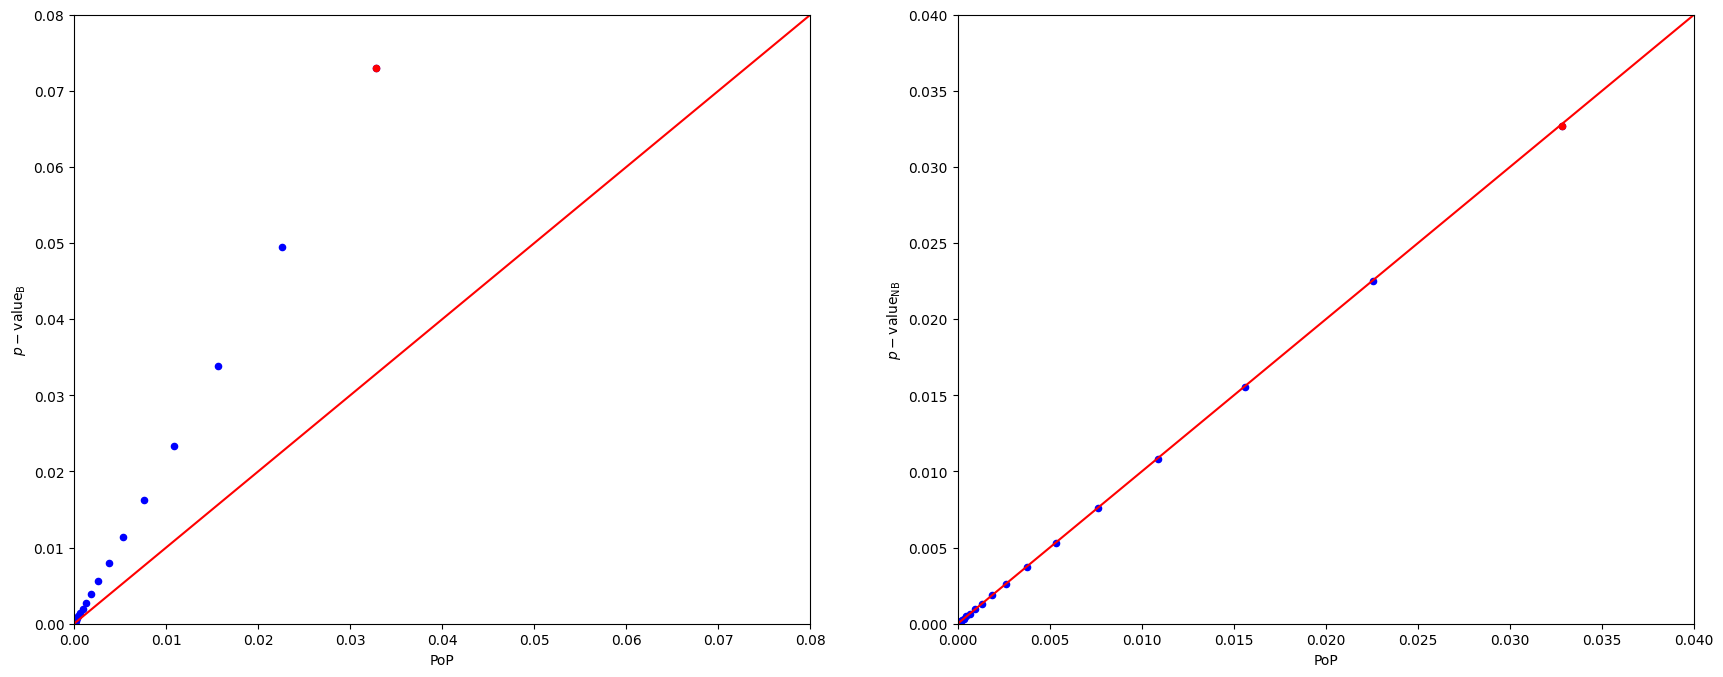

In [30]:

draw_line_start = [0,1]
draw_line_end = [0,1]

PoP_obs = scipy.special.betainc(9+alpha, 3+alpha, 0.5)
ax1 = fig2.add_subplot(121)
ax1.scatter(PoP_list_d, pvalue_B_list_d, c='blue',edgecolors='blue', s = 20, marker ='o')
ax1.scatter(PoP_obs, pvalue_B, c='red',edgecolors='red', s = 20, marker ='o')

ax1.set_xlabel("PoP")
ax1.set_ylabel("$p-{\\rmvalue}_{\\rm B}$")
ax1.set_ylim(0,0.08)
ax1.set_xlim(0,0.08)
ax1.plot(draw_line_start, draw_line_end, color = 'red')

ax2 = fig2.add_subplot(122)
ax2.scatter(PoP_list_d, pvalue_NB_list_d, c='blue',edgecolors='blue', s = 20, marker ='o')
ax2.scatter(PoP_obs, pvalue_NB, c='red',edgecolors='red', s = 20, marker ='o')

ax2.set_xlabel("PoP")
ax2.set_ylabel("$p-{\\rmvalue}_{\\rm NB}$")
ax2.set_ylim(0,0.04)
ax2.set_xlim(0,0.04)
ax2.plot(draw_line_start, draw_line_end, color = 'red')
fig2.subplots_adjust(top = 0.98, left = 0.05, right= 0.95)

plt.show()

